<a href="https://colab.research.google.com/github/Asada0815/100knock/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2020-10-25 15:56:09--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.07s   

2020-10-25 15:56:09 (13.0 MB/s) - ‘neko.txt’ saved [975789/975789]



In [2]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 21 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [5]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [6]:
!head -15 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


In [9]:
## 30 形態素解析結果の読み込み

filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
  for line in f:
    if line != 'EOS\n':
      fields = line.split('\t')
      if len(fields) != 2 or fields[0] == '':
        continue
      else:
        attr = fields[1].split(',')
        morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
        morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


In [12]:
## 31 動詞

ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['surface'])

print(f'動詞の表層形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
  print(v)

動詞の表層形の種類: 3893

---サンプル---
伸し
貰お
休ん
すぎ
見廻
伝える
のしかから
あたわ
折る
聞き惚れ


In [13]:
## 32 動詞の原形

ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['base'])

# 確認
print(f'動詞の原形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
  print(v)

動詞の原形の種類: 2300

---サンプル---
気取る
さばける
しまる
差しかかる
伝える
見届ける
混ぜる
折る
すれる
いえる


In [14]:
## 33 AのB

ans = set()
for sentence in sentences:
  for i in range(1, len(sentence) - 1):
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
      ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

# 確認
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

「名詞+の+名詞」の種類: 4924

---サンプル---
猫の方
煩悶の極
家の説
瓦解の折
敵の計
ままのそり
種類のもの
人間の癖
Hierophilusの講義
相当の時機


In [15]:
## 34 名詞の連接

ans = set()
for sentence in sentences:
  nouns = ''
  num = 0
  for morph in sentence:
    if morph['pos'] == '名詞':  # 最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
      nouns = ''.join([nouns, morph['surface']])
      num += 1
    elif num >= 2:  # 名詞以外、かつここまでの連結数が2以上の場合は出力し、nounsとnumを初期化
      ans.add(nouns)
      nouns = ''
      num = 0
    else:  # それ以外の場合、nounsとnumを初期化
      nouns = ''
      num = 0
  if num >= 2: 
    ans.add(nouns)

# 確認
print(f'連接名詞の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

連接名詞の種類: 4457

---サンプル---
書生時代
何冊
二三度瞬
珍報
人の
十年一狐裘
七日目
筋違
彼等人類
専門的知識


In [16]:
## 35 単語の出現頻度

from collections import defaultdict 

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 確認
for w in ans[:10]:
  print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


In [17]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 4.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120275 sha256=35d31ec705a546eecf526c50cde32c52db80b35a052ed7eea442f244e69857cf
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


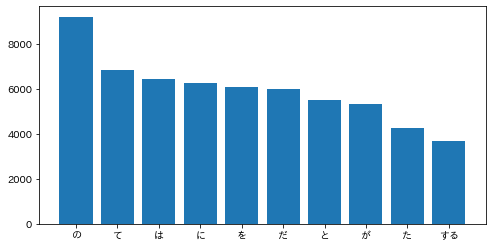

In [18]:
## 36 頻度上位10語

import matplotlib.pyplot as plt
import japanize_matplotlib

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

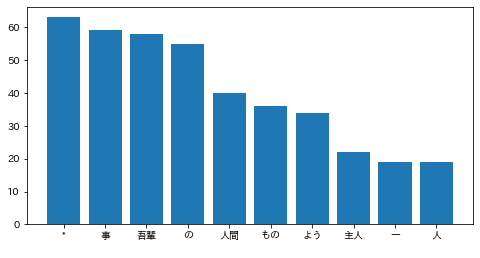

In [24]:
## 37 「猫」と共起頻度の高い上位10語

ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:  # 文章の形態素に「猫」が含まれる場合のみ辞書に追加
    for morph in sentence:
      if morph['pos'] == '名詞':
        ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

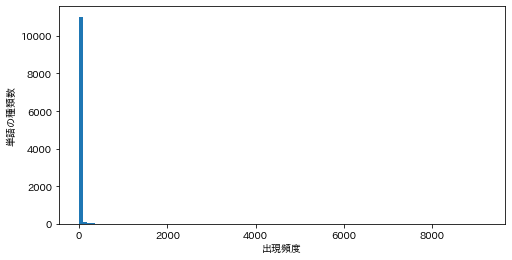

In [20]:
## 38 ヒストグラム

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

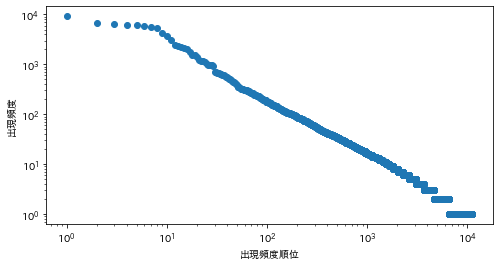

In [21]:
## 39 Zipfの法則

import math

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()